In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import torchvision
import numpy as np
from torchvision import transforms
from PIL import Image

In [4]:
list_path = ['./Pic1.png','./Pic2.png','./Pic3.png','./Pic4.png']
num_images = len(list_path)
num_columns = (num_images + 1) // 2  # Ceiling division for columns
image = Image.open(list_path[3])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))

image = Image.open(list_path[0])
w,h =image.size
print(f'Width: {w}, Height: {h}')
print(type(image))
num_rows = 1
num_columns = 4

Width: 1400, Height: 1729
<class 'PIL.PngImagePlugin.PngImageFile'>
Width: 1450, Height: 1753
<class 'PIL.PngImagePlugin.PngImageFile'>


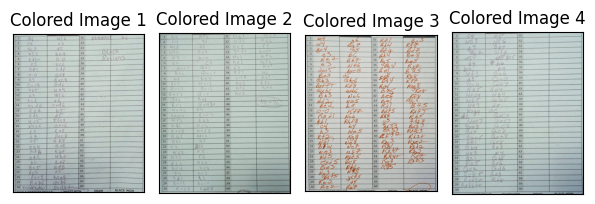

In [12]:
new_width, new_height = 1000,1200
plt.figure(figsize=(6,6))
for i in range(num_images):
    image = cv2.imread(list_path[i])
    # resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image, cmap='gray',)
    plt.title(f'Colored Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

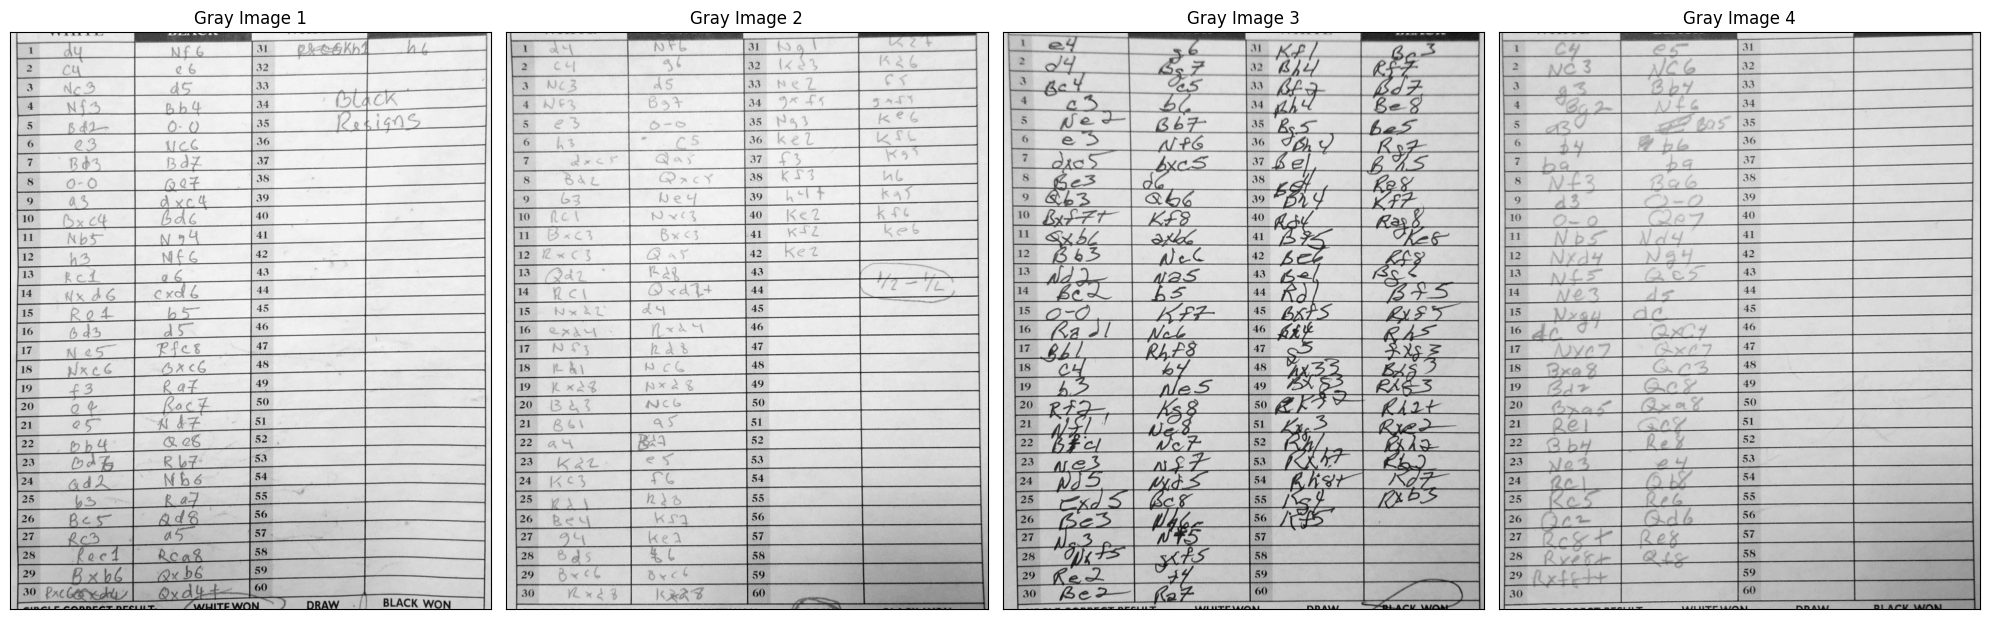

In [23]:
gray_img_list = []
for i in range(len(list_path)):
    image = cv2.imread(list_path[i])
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    image_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray_img_list.append(image_gray)

plt.figure(figsize=(20,20))
for i in range(num_images):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(gray_img_list[i], cmap='gray',)
    plt.title(f'Gray Image {i + 1}')
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

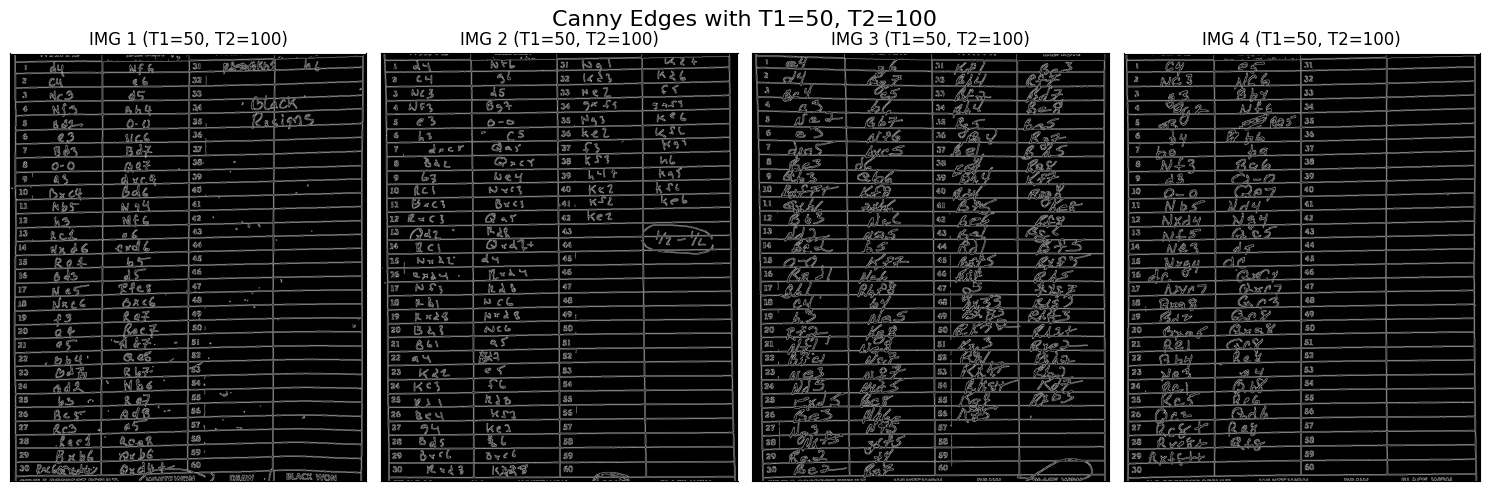

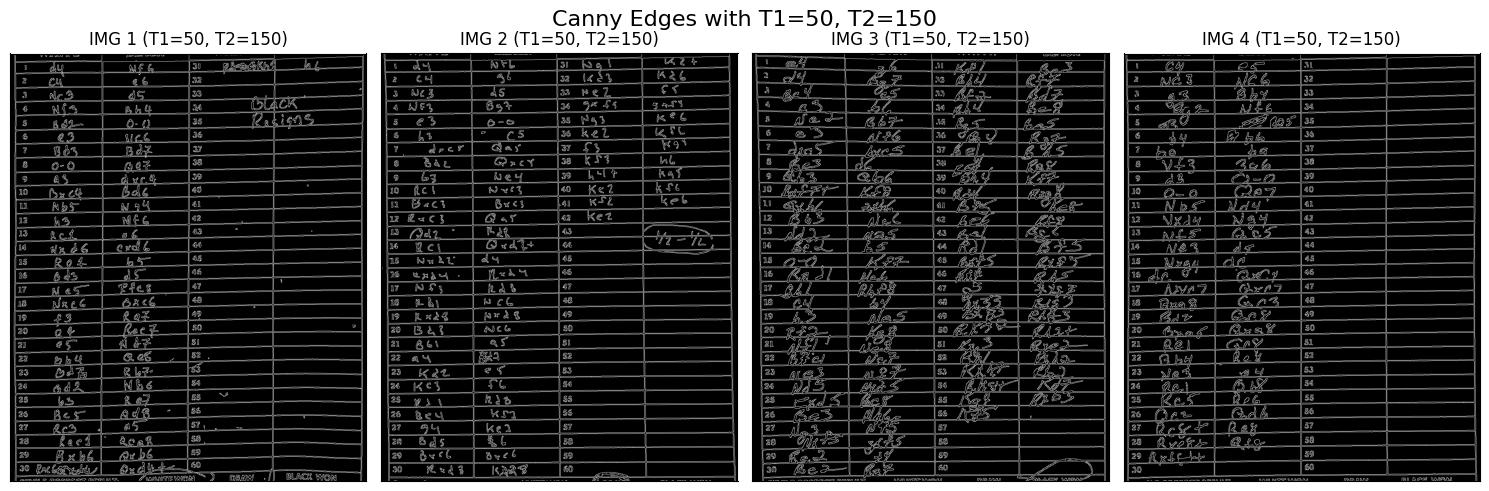

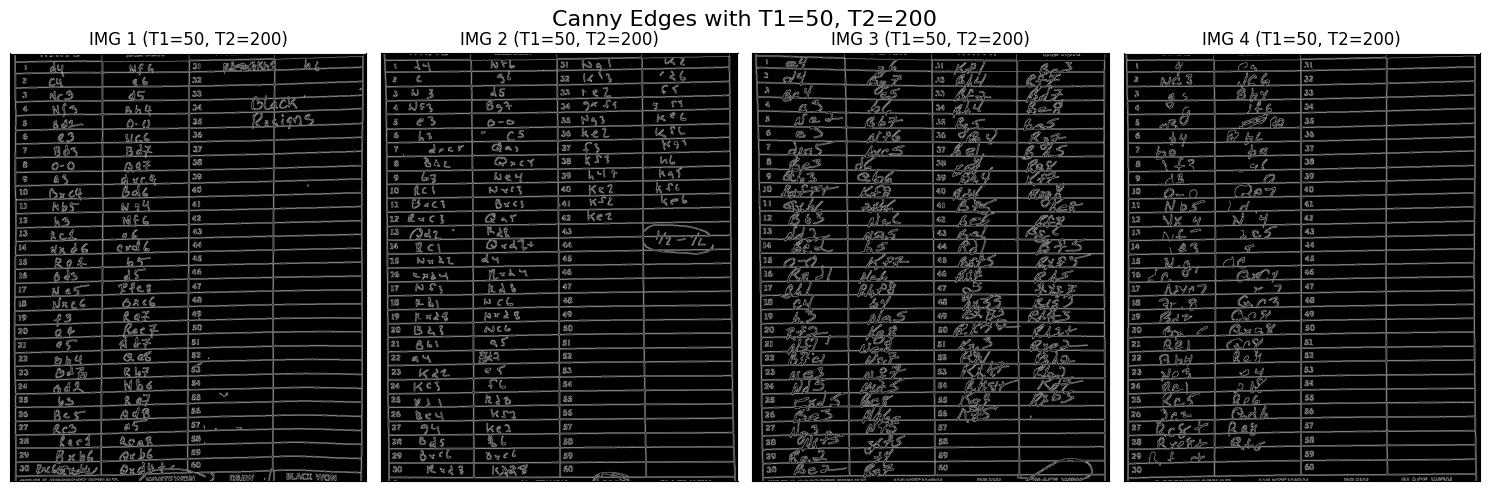

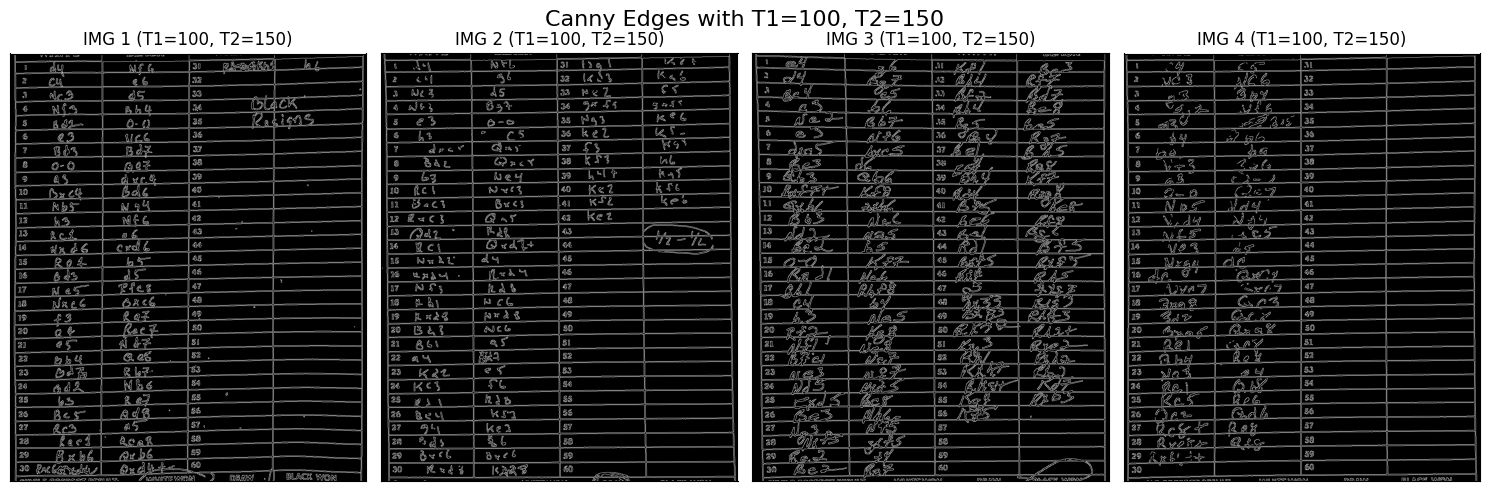

In [20]:
edges_images = []
plt.figure(figsize=(15, 15))

threshold_pairs = [(50, 100), (50, 150), (50, 200), (100, 150)]

for j, (thresh1, thresh2) in enumerate(threshold_pairs):
    plt.figure(figsize=(15, 5)) 
    for i in range(num_images):
        edges = cv2.Canny(gray_img_list[i], threshold1=thresh1, threshold2=thresh2)
        edges_images.append(edges)

        plt.subplot(1, num_images, i + 1) 
        plt.imshow(edges, cmap='gray')
        plt.title(f'IMG {i + 1} (T1={thresh1}, T2={thresh2})')
        plt.xticks([]), plt.yticks([])

    plt.suptitle(f'Canny Edges with T1={thresh1}, T2={thresh2}', fontsize=16)
    plt.tight_layout()
    plt.show()

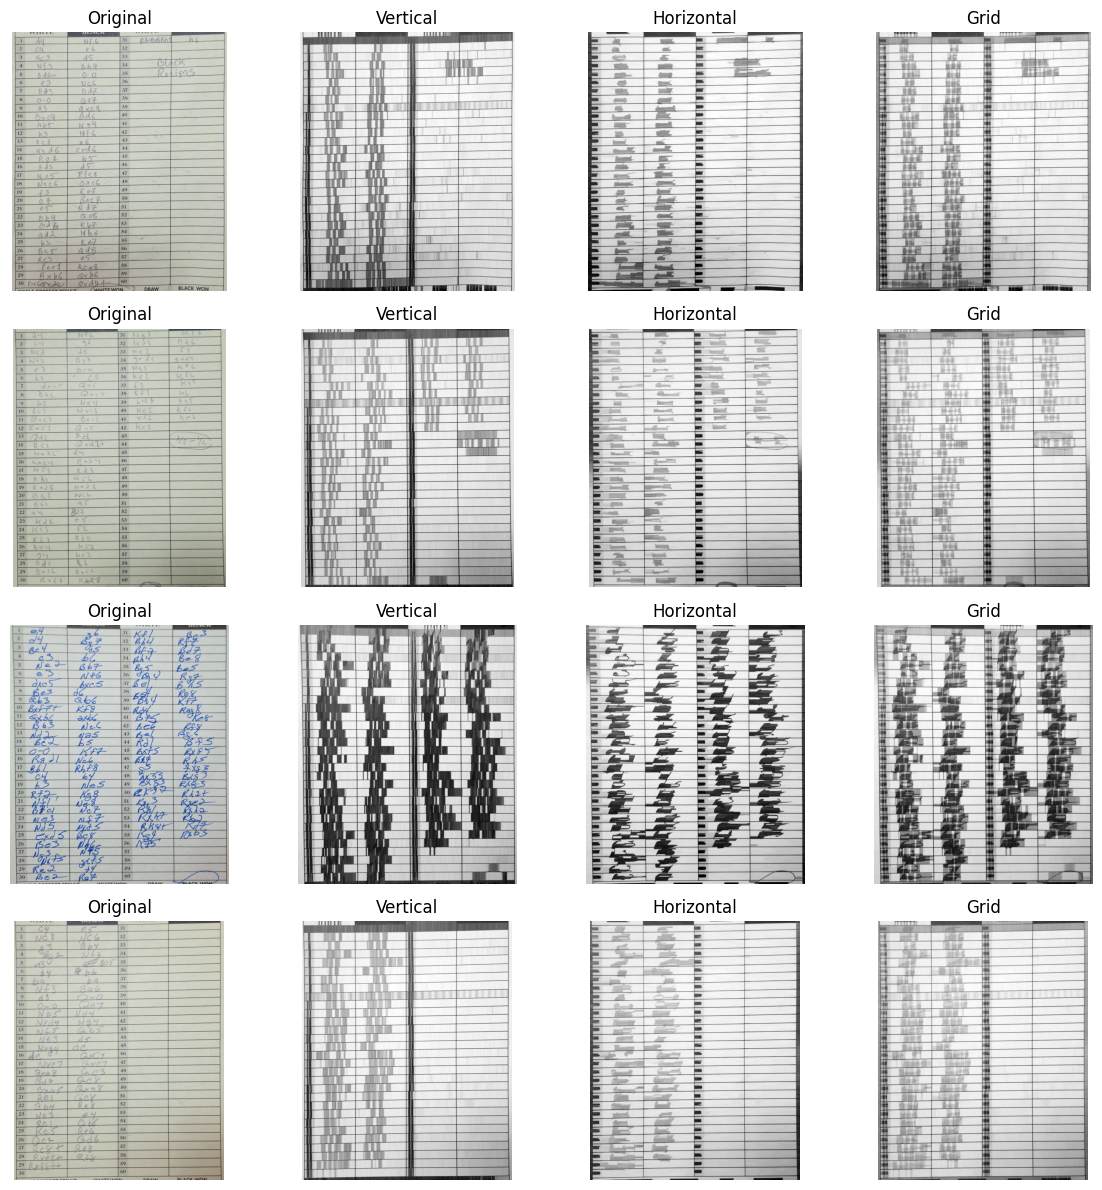

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn có danh sách 4 ảnh màu
color_img_list = [cv2.imread(i) for i in list_path]

# Danh sách lưu kết quả
vertical_list, horizontal_list, grid_list = [], [], []
cell_list = []  # Lưu danh sách ô chữ viết tay

# Kernel để tìm đường dọc và ngang
kernel_v = np.ones((50, 1), np.uint8)
kernel_h = np.ones((1, 50), np.uint8)

for img in color_img_list:
    # **1. Tách kênh màu để tìm đường kẻ (dùng kênh xanh lá G vì thường đường kẻ đen nổi bật ở đó)**
    green_channel = img[:, :, 1]  # Lấy kênh Green (G)

    # **2. Phát hiện đường kẻ dọc và ngang**
    vertical_lines = cv2.morphologyEx(green_channel, cv2.MORPH_OPEN, kernel_v)
    horizontal_lines = cv2.morphologyEx(green_channel, cv2.MORPH_OPEN, kernel_h)

    # **3. Kết hợp đường dọc và ngang để tạo lưới**
    grid = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0)

    # **4. Tìm contours để tách từng ô**
    contours, _ = cv2.findContours(grid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Lọc ô chữ viết tay bằng kích thước phù hợp
    cells = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 20 and h > 20:  # Ngưỡng để loại bỏ vùng nhiễu nhỏ
            cells.append((x, y, w, h))

    # Sắp xếp ô từ trên xuống dưới, trái sang phải
    cells = sorted(cells, key=lambda b: (b[1], b[0]))
    cell_list.append(cells)

    # Lưu kết quả
    vertical_list.append(vertical_lines)
    horizontal_list.append(horizontal_lines)
    grid_list.append(grid)

# **5. Hiển thị kết quả (4 ảnh x 4 bước = 16 ảnh)**
all_images = [img for i in range(4) for img in [color_img_list[i], vertical_list[i], horizontal_list[i], grid_list[i]]]
titles = ["Original", "Vertical", "Horizontal", "Grid"] * 4  # Tiêu đề

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    if i % 4 == 0:
        plt.imshow(cv2.cvtColor(all_images[i], cv2.COLOR_BGR2RGB))  # Ảnh gốc giữ màu
    else:
        plt.imshow(all_images[i], cmap="gray")  # Các bước xử lý hiển thị ảnh xám
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

# **6. Cắt ô chứa chữ viết tay từ ảnh màu**
for i, img in enumerate(color_img_list):
    for (x, y, w, h) in cell_list[i]:
        cell = img[y:y+h, x:x+w]  # Cắt từ ảnh gốc màu
        cv2.imshow(f"Cell {i}", cell)
        cv2.waitKey(500)

cv2.destroyAllWindows()
